In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

In [3]:
df = pd.read_csv('anthrokids.csv')

In [4]:
df

,id,mass,height,waist,foot,sittingHeight,upperLegLength,kneeHeight,forearmLength,age,gender,handedness,birthOrder
0,1,15.5,103.3,47.5,16.3,582.0,306.0,NaN,259.0,4.219,F,right,1.0
1,2,17.6,103.9,49.8,16.3,606.0,311.0,NaN,274.0,4.326,M,right,1.0
2,3,23.0,111.2,52.0,17.1,594.0,387.0,NaN,304.0,4.476,F,right,1.0
3,4,16.5,99.7,49.1,16.3,542.0,312.0,NaN,281.0,3.841,F,both,1.0
4,5,15.0,99.7,46.5,16.7,524.0,321.0,NaN,269.0,3.460,F,both,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,91096,16.0,103.6,48.7,16.5,597.0,307.0,307.0,269.0,3.403,M,both,2.0
3896,91097,14.3,99.9,46.0,15.1,582.0,291.0,275.0,253.0,3.397,M,left,4.0
3897,91099,12.4,90.5,47.6,14.1,537.0,289.0,254.0,224.0,2.442,F,right,1.0
3898,91100,18.4,100.7,55.1,16.1,570.0,320.0,303.0,273.0,4.188,M,right,1.0


In [5]:
print(df.age)

0       4.219
1       4.326
2       4.476
3       3.841
4       3.460
        ...  
3895    3.403
3896    3.397
3897    2.442
3898    4.188
3899    4.974
Name: age, Length: 3900, dtype: float64


In [6]:
#function to round integer values


def rounding(age):
    vals = str(age).split('.')
    if (int(vals[1][0])>=5):
        vals[0] = int(vals[0])+1
    else:
        pass
    return(int(vals[0]))     

In [7]:
df1=  df[df['age'].isnull()]

In [8]:
df1.head()

,id,mass,height,waist,foot,sittingHeight,upperLegLength,kneeHeight,forearmLength,age,gender,handedness,birthOrder
1029,15034,44.8,154.7,60.3,21.4,838.0,519.0,468.0,402.0,NaN,M,NaN,NaN
1402,22023,15.0,94.4,51.1,15.2,563.0,285.0,271.0,253.0,NaN,M,NaN,NaN


In [9]:
df.dropna(subset=['age'],inplace = True)   # remove null values from the original data frame.

In [10]:
# integrating the rounding function to the Age column to get rounded age values
age_list = []
for i in df.age:
    if(type(i)!= float): # code to check if it's an integer. if it is, then no need to round it.
        age_list.append(i)
    else:
        age_list.append(rounding(i))

print(age_list)
  

[4, 4, 4, 4, 3, 4, 3, 4, 6, 5, 5, 14, 14, 14, 13, 13, 13, 13, 12, 14, 13, 13, 12, 13, 13, 12, 14, 14, 12, 12, 14, 12, 13, 13, 14, 13, 14, 14, 14, 14, 13, 14, 13, 14, 14, 13, 14, 14, 13, 12, 12, 13, 10, 10, 6, 7, 12, 6, 5, 9, 9, 10, 7, 7, 11, 9, 8, 7, 8, 9, 8, 8, 7, 12, 5, 7, 7, 5, 8, 9, 9, 8, 11, 10, 10, 11, 12, 11, 11, 10, 10, 11, 13, 11, 12, 11, 11, 12, 12, 12, 10, 9, 10, 10, 11, 10, 10, 11, 11, 12, 12, 5, 16, 17, 17, 18, 18, 17, 19, 17, 17, 17, 19, 18, 16, 15, 15, 17, 17, 15, 14, 15, 16, 17, 17, 16, 16, 16, 18, 18, 16, 16, 17, 18, 16, 16, 15, 15, 17, 16, 16, 20, 15, 17, 15, 14, 15, 16, 15, 19, 16, 17, 16, 17, 14, 16, 18, 16, 17, 18, 15, 5, 4, 5, 4, 3, 4, 4, 4, 6, 8, 9, 8, 8, 6, 7, 6, 8, 8, 9, 7, 7, 7, 6, 6, 8, 6, 6, 6, 7, 7, 9, 8, 7, 7, 10, 8, 8, 8, 8, 7, 6, 8, 8, 9, 7, 6, 6, 7, 8, 9, 7, 9, 6, 7, 7, 6, 5, 6, 7, 6, 4, 5, 5, 5, 4, 3, 3, 3, 4, 6, 5, 4, 6, 3, 4, 4, 5, 4, 4, 5, 5, 5, 4, 4, 5, 4, 4, 3, 3, 4, 4, 5, 5, 5, 4, 3, 5, 5, 8, 8, 12, 18, 17, 13, 14, 14, 16, 18, 13, 7, 5, 5, 14, 15

In [11]:
#1 a) to find the frequencies of Age column 

age_dict ={}
for i in age_list:
    if i not in age_dict.keys():
        age_dict[i] = 1
    else:
        age_dict[i] = age_dict[i] +1


sorted_age_dict = dict(sorted(age_dict.items()))
print(sorted_age_dict)
                       

{2: 56, 3: 157, 4: 228, 5: 271, 6: 245, 7: 231, 8: 198, 9: 257, 10: 258, 11: 282, 12: 287, 13: 315, 14: 271, 15: 264, 16: 198, 17: 221, 18: 139, 19: 19, 20: 1}


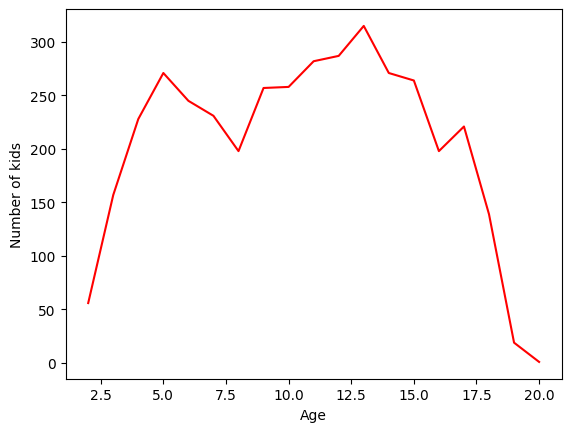

In [12]:
#plotting using matplotlib


import matplotlib.pyplot as plt
plt.plot(sorted_age_dict.keys(),sorted_age_dict.values(), color='red')
plt.xlabel('Age')
plt.ylabel('Number of kids')
plt.show()

In [13]:
#Calculating the parameters: Mean and standard deviation
import math
sums =0
for i,j in sorted_age_dict.items():
    sums = sums+(i*j)
mean = sums/len(age_list)
print("Mean:",mean)

sd = 0

for key in sorted_age_dict.keys():
    sd = sd + (key - mean)**2 

sd = sd / (len(sorted_age_dict)-1)
print("Standard deviation:",math.sqrt(sd))



Mean: 10.41995895330939
Standard deviation: 5.658781301369251


In [14]:
#Sampling

In [29]:
#1 b) Sample from the multinomial distribution


r = 23376489
a = 4533456
b = 124245
m = len(age_list)

def random():
    global r 
    r =  (a*r*b)%m
    return r
#print(int(random()))

In [31]:
#Sampling a 1000 data samples

sample = list()

for i in range(1000):
    sample.append(age_list[int(random())])
print(sample)

[5, 4, 7, 7, 9, 18, 6, 16, 14, 18, 8, 17, 8, 3, 18, 4, 9, 15, 12, 13, 19, 14, 12, 14, 13, 17, 9, 16, 2, 12, 14, 12, 9, 5, 8, 12, 19, 9, 4, 12, 17, 15, 8, 17, 12, 10, 7, 11, 9, 19, 14, 5, 10, 7, 2, 5, 10, 14, 11, 9, 7, 5, 3, 3, 5, 12, 8, 15, 12, 12, 10, 11, 14, 4, 6, 11, 9, 6, 15, 5, 7, 3, 11, 18, 5, 15, 5, 11, 13, 18, 6, 17, 16, 14, 17, 6, 13, 10, 8, 12, 15, 18, 18, 4, 11, 2, 9, 17, 5, 11, 12, 11, 13, 5, 5, 11, 13, 16, 13, 16, 17, 13, 18, 14, 14, 15, 13, 12, 15, 4, 4, 6, 9, 10, 5, 5, 6, 17, 17, 7, 5, 13, 14, 9, 7, 8, 6, 7, 11, 16, 7, 12, 5, 4, 6, 15, 11, 8, 17, 10, 12, 8, 6, 15, 8, 13, 13, 18, 12, 5, 13, 13, 17, 9, 10, 18, 8, 15, 14, 10, 4, 12, 12, 3, 12, 8, 18, 15, 8, 13, 13, 10, 15, 15, 15, 9, 3, 17, 9, 12, 7, 17, 4, 3, 6, 7, 8, 12, 18, 7, 4, 4, 6, 6, 17, 3, 10, 2, 13, 13, 17, 9, 12, 16, 4, 12, 2, 14, 15, 7, 10, 9, 16, 5, 9, 6, 16, 3, 16, 4, 6, 11, 15, 15, 14, 10, 7, 15, 14, 2, 5, 8, 4, 11, 10, 11, 14, 11, 9, 4, 15, 14, 5, 5, 4, 6, 12, 15, 10, 16, 13, 17, 12, 11, 14, 17, 8, 15, 15, 6

In [32]:
#Finding the frquences of the sampled dataset

sample_age_dict ={}
for i in sample:
    if i not in sample_age_dict.keys():
        sample_age_dict[i] = 1
    else:
        sample_age_dict[i] = sample_age_dict[i] +1


sorted_sample_age_dict = dict(sorted(sample_age_dict.items()))
print(sorted_sample_age_dict)

{2: 22, 3: 41, 4: 54, 5: 71, 6: 65, 7: 56, 8: 54, 9: 66, 10: 71, 11: 63, 12: 83, 13: 69, 14: 64, 15: 66, 16: 50, 17: 65, 18: 35, 19: 5}


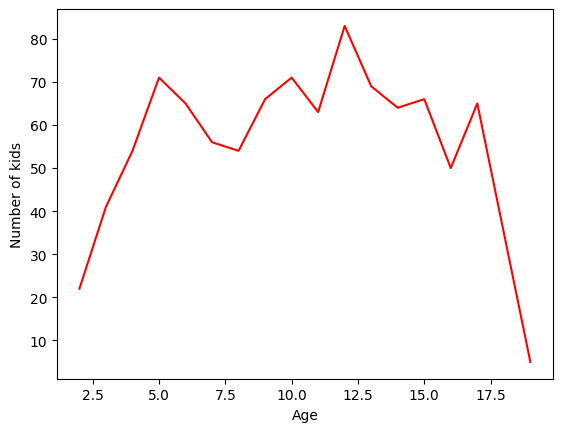

In [33]:
import matplotlib.pyplot as plt
plt.plot(sorted_sample_age_dict.keys(),sorted_sample_age_dict.values(), color='red')
plt.xlabel('Age')
plt.ylabel('Number of kids')
plt.show()

In [35]:
#Calculating the parameters: Mean and standard deviation
import math
sums =0
for i,j in sorted_sample_age_dict.items():
    sums = sums+(i*j)
mean = sums/len(sample)
print("Mean:",mean)

sd = 0

for key in sorted_sample_age_dict.keys():
    sd = sd + (key - mean)**2 

sd = sd / (len(sorted_sample_age_dict)-1)
print("Standard deviation:",math.sqrt(sd))

Mean: 10.358
Standard deviation: 5.340538373389621


1 c) 
Now Checking the parameter values before and after sampling:

Before sampling(:
Mean - 10.41995895330939
Standard deviation - 5.658781301369251

After sampling(1000 samples):
Mean - 10.358
Standard deviation -5.340538373389621

The values are close and the graphs are similar.So, the samples really follow the distribution from 1 a.

In [37]:

# Trying out the mulinomial formula from scratch. (Not a part of the exercise!)

import sys
sys.set_int_max_str_digits(0)
sys.setrecursionlimit(4000)
count = len(age_list) # gives the total count of Age values.
#print(count)
def factorialnos(n):  #function to find factorial of a given number
    if n == 0:
        return 1
    else:
        return n * factorialnos(n-1)


denominator =1
for vals in age_dict.values():
    result = factorialnos(vals)
    denominator *=result

prob = 1         #calculating the probabilities of each age
for keys,vals in age_dict.items():
    result = vals/count
    print("Probablity of age",keys,"=", result)
    prob*= result

numerator = factorialnos(count)
res = (numerator//denominator)   # formula to find multinomial ----> ((n!/ x1!,x2!....xk!) * p1x1.p2x2.p3x3....pkxk) where x1+x2+...xk = n and p1x1+p2x2+p3x3....+pkxk = 1
from decimal import Decimal
multinomial = res*Decimal(prob) 
print("Probability is",multinomial)

Probablity of age 4 = 0.05849153412006157
Probablity of age 3 = 0.04027706516162134
Probablity of age 6 = 0.06285274499743458
Probablity of age 5 = 0.06952283222165213
Probablity of age 14 = 0.06952283222165213
Probablity of age 13 = 0.08081067213955875
Probablity of age 12 = 0.07362750128270908
Probablity of age 10 = 0.06618778860954336
Probablity of age 7 = 0.05926115956900975
Probablity of age 9 = 0.0659312467932273
Probablity of age 11 = 0.07234479220112879
Probablity of age 8 = 0.05079527963057978
Probablity of age 16 = 0.05079527963057978
Probablity of age 17 = 0.056695741405849154
Probablity of age 18 = 0.035659312467932275
Probablity of age 19 = 0.0048742945100051305
Probablity of age 15 = 0.06772703950743972
Probablity of age 20 = 0.0002565418163160595
Probablity of age 2 = 0.014366341713699333
Probability is 4.664244339928473642307697605E+4699
